# Libraries

In [1984]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Exploratory Data Analysis (EDA)

In [1985]:
# define function to load dataset
def load_data(filename):
    read_csv = pd.read_csv(os.path.join("dataset", filename))
    return read_csv

### Basic Data Exploration

In [1986]:
# load the dataset
df = load_data("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1987]:
del df["car_ID"]    # not needed for modelling
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1988]:
# quick description of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [1989]:
# summary of the numerical attributes
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1990]:
# check for missing values
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Data Visualization

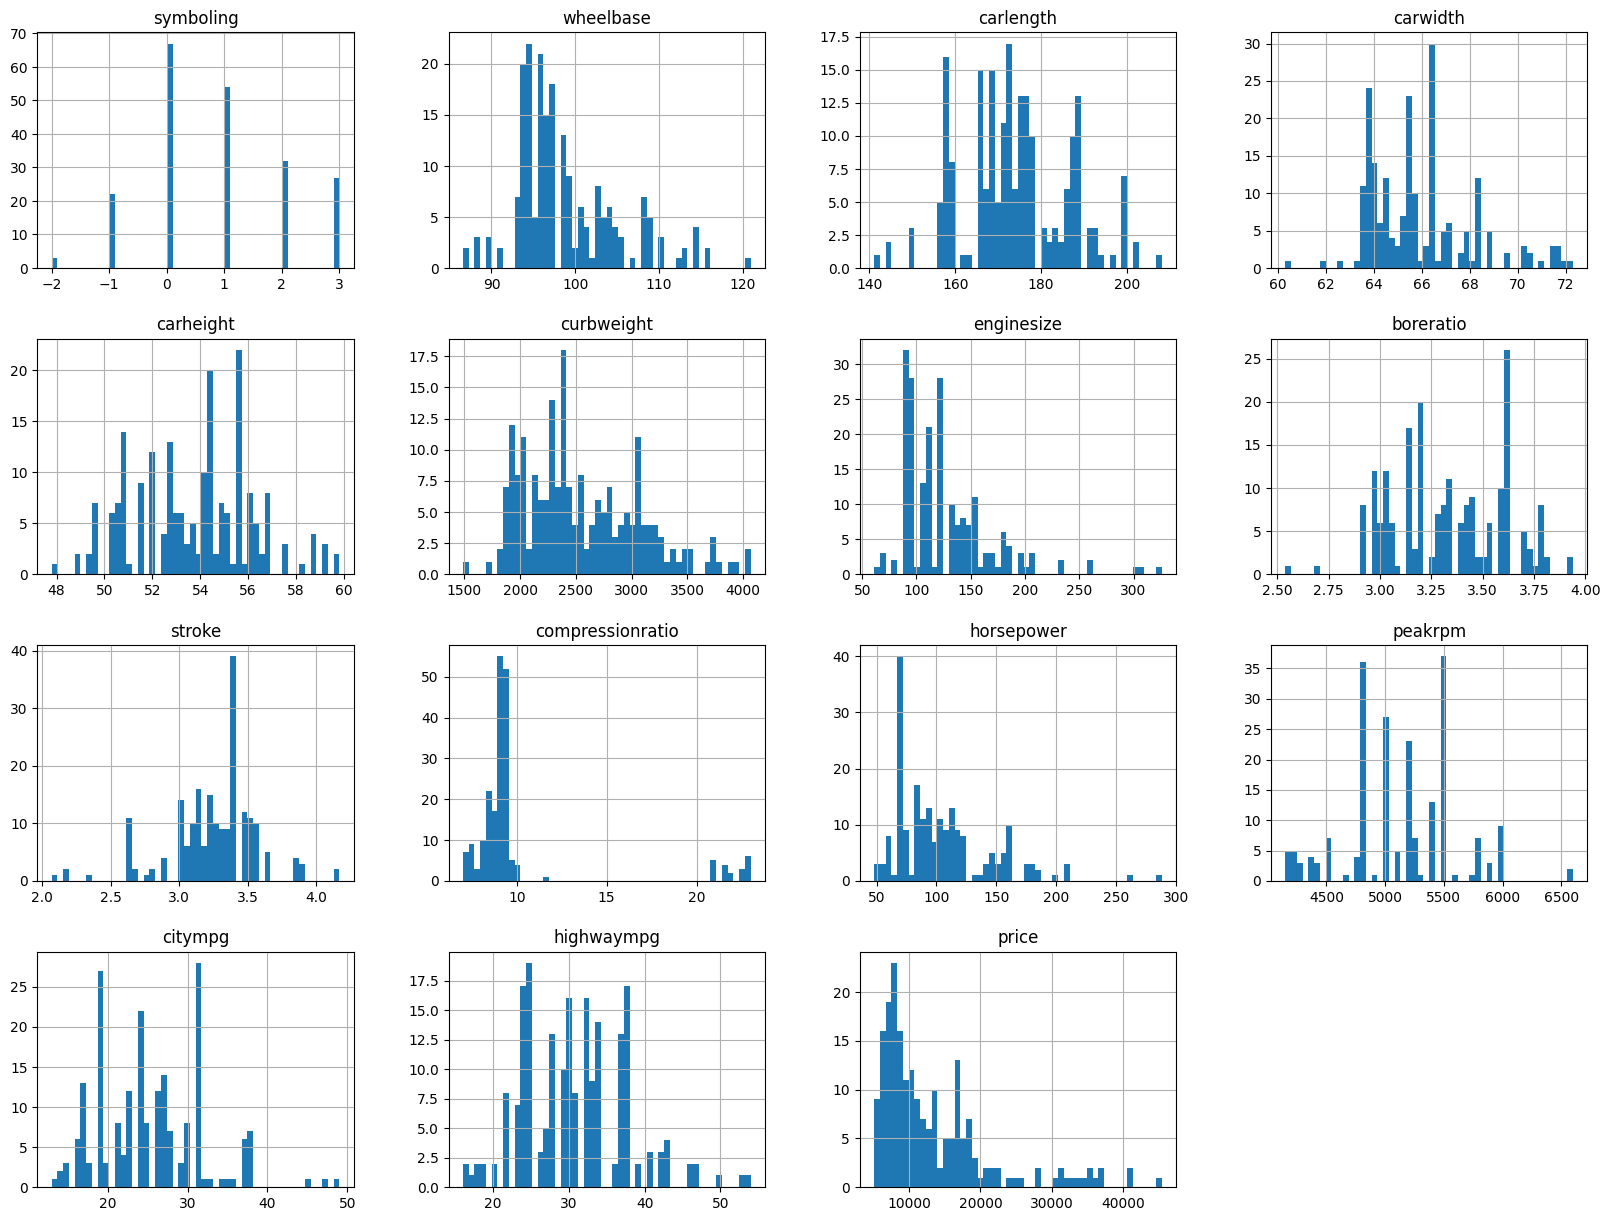

In [1991]:
# plot histogram of the numerical attributes to gain more insight
df.hist(bins=50, figsize=(20, 15))
plt.show()

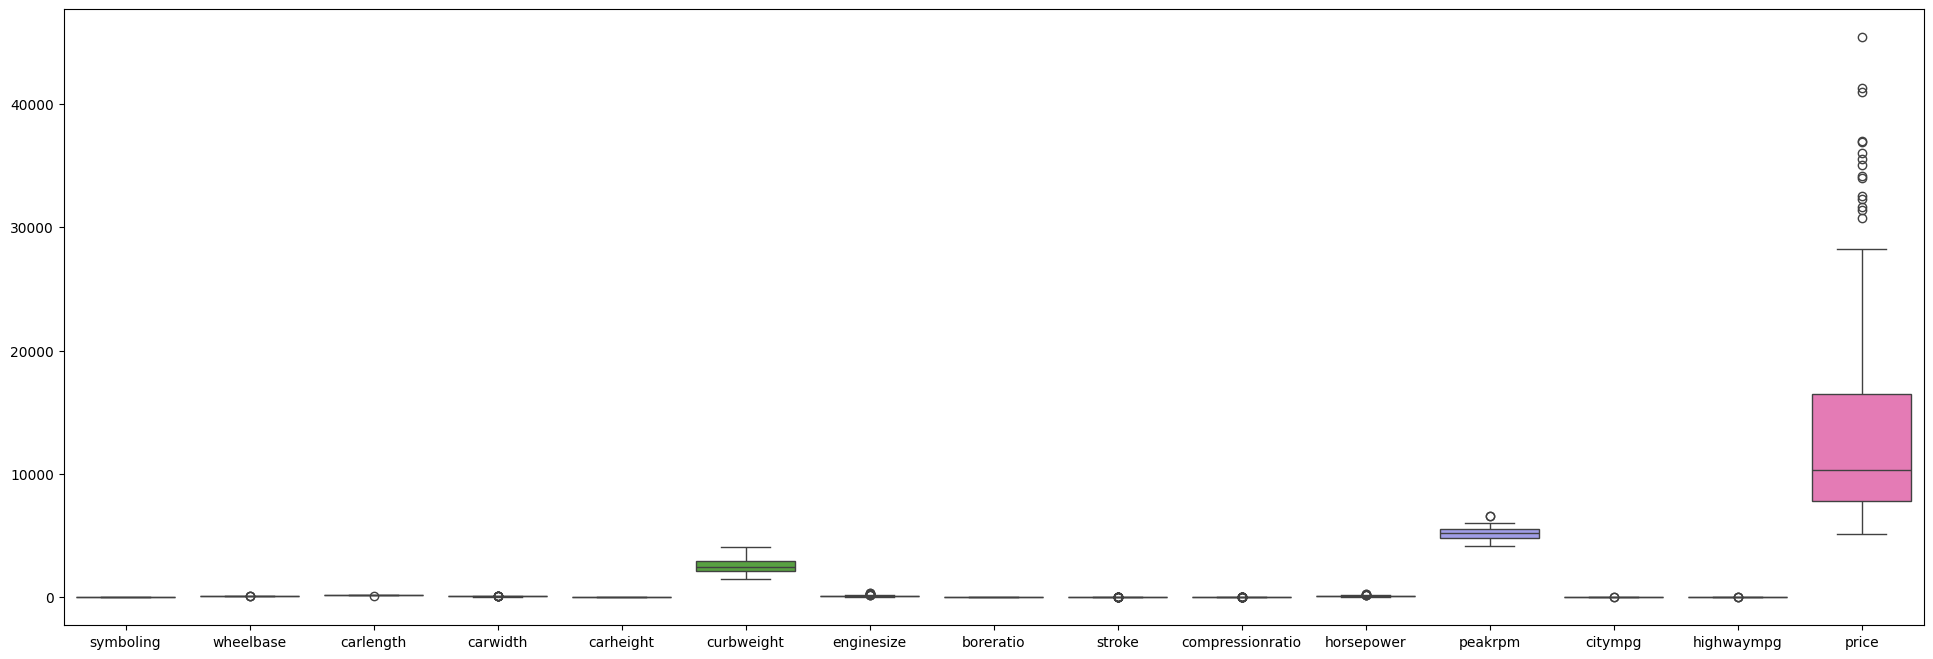

In [1992]:
# check for outliers
plt.figure(figsize=(24, 8))
sns.boxplot(data=df)
plt.show()

#### Correlation Analysis

In [1993]:
# correlation matrix only works on numerical attributes, so we'll need to drop all categorical
# attributes before proceeding
cat_att = df.select_dtypes(include=["object"]).columns

df_num = df.drop(cat_att, axis=1)

# check the correlation matrix against the target variable (price)
corr = df_num.corr()
corr["price"].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

The attributes: 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', and 'boreratio' have strong positive correlations with the price.
The attributes: 'citympg', and 'highwaympg' have strong negative corrlations with the price.
The attributes: 'stroke', compressionratio', 'symboling', and 'peakrpm' have no correlations with the price

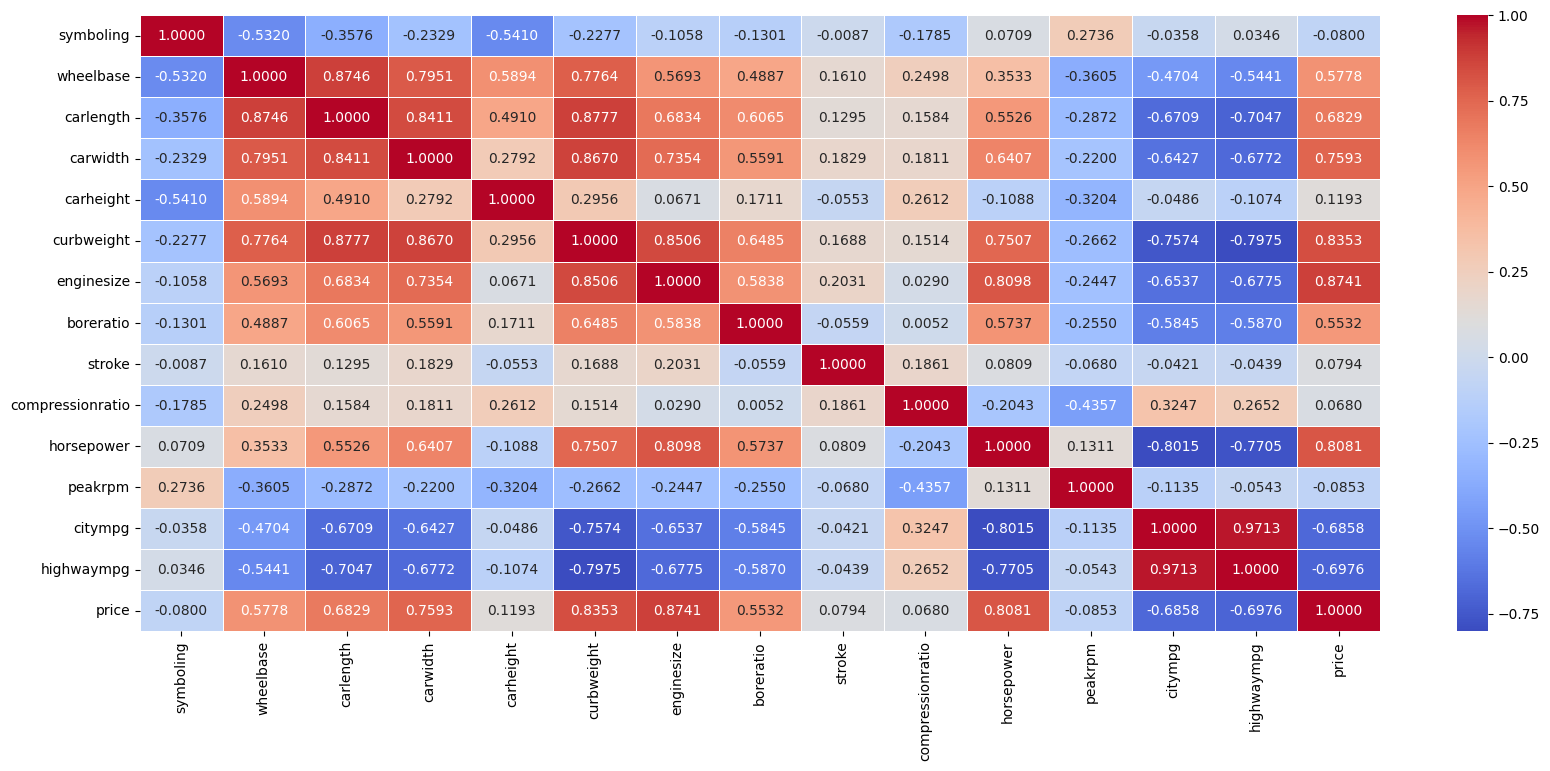

In [1994]:
# visualize the correlation between the numerical attributes
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".4f")
plt.show()

In [1995]:
# check for multicollinearity in dataset with variance inflation factor (VIF)
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_result = calculate_vif(df_num.drop("price", axis=1))
vif_result

,Variable,VIF
0,symboling,2.540920
1,wheelbase,2254.716977
2,carlength,1893.738263
3,carwidth,2828.144983
4,carheight,929.458469
5,curbweight,403.471933
6,enginesize,68.872234
7,boreratio,291.357019
8,stroke,126.412487
9,compressionratio,15.834999


In [1996]:
# identify highly correlated pairs of features
corr = df_num.drop("price", axis=1).corr()
threshold = 0.75

high_corr_pairs = [(i, j) for i in range(len(corr.columns))
                           for j in range(i + 1, len(corr.columns))
                           if abs(corr.iloc[i, j]) > threshold]

for pair in high_corr_pairs:
    feature1 = corr.columns[pair[0]]
    feature2 = corr.columns[pair[1]]
    corr_value = corr.iloc[pair[0], pair[1]]

    print(f"Pair: ({feature1}, {feature2}), Correlation: {corr_value:.2f}")

Pair: (wheelbase, carlength), Correlation: 0.87
Pair: (wheelbase, carwidth), Correlation: 0.80
Pair: (wheelbase, curbweight), Correlation: 0.78
Pair: (carlength, carwidth), Correlation: 0.84
Pair: (carlength, curbweight), Correlation: 0.88
Pair: (carwidth, curbweight), Correlation: 0.87
Pair: (curbweight, enginesize), Correlation: 0.85
Pair: (curbweight, horsepower), Correlation: 0.75
Pair: (curbweight, citympg), Correlation: -0.76
Pair: (curbweight, highwaympg), Correlation: -0.80
Pair: (enginesize, horsepower), Correlation: 0.81
Pair: (horsepower, citympg), Correlation: -0.80
Pair: (horsepower, highwaympg), Correlation: -0.77
Pair: (citympg, highwaympg), Correlation: 0.97


In [1997]:
# drop one of the highly correlated pairs features from both df_num and df
df = df.drop(columns=["wheelbase", "curbweight", "carlength", "horsepower", "highwaympg"], axis=1)
df_num = df_num.drop(columns=["wheelbase", "curbweight", "carlength", "horsepower", "highwaympg"], axis=1)
df_num = df_num.drop("price", axis=1)   # drop target variable from numerical dataset

In [1998]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,64.1,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,65.5,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,19,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,66.2,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,5500,24,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,66.4,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,5500,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,68.9,55.5,ohc,four,141,mpfi,3.78,3.15,9.5,5400,23,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,68.8,55.5,ohc,four,141,mpfi,3.78,3.15,8.7,5300,19,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,68.9,55.5,ohcv,six,173,mpfi,3.58,2.87,8.8,5500,18,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,68.9,55.5,ohc,six,145,idi,3.01,3.40,23.0,4800,26,22470.0


In [1999]:
df_num

,symboling,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg
0,3,64.1,48.8,130,3.47,2.68,9.0,5000,21
1,3,64.1,48.8,130,3.47,2.68,9.0,5000,21
2,1,65.5,52.4,152,2.68,3.47,9.0,5000,19
3,2,66.2,54.3,109,3.19,3.40,10.0,5500,24
4,2,66.4,54.3,136,3.19,3.40,8.0,5500,18
...,...,...,...,...,...,...,...,...,...
200,-1,68.9,55.5,141,3.78,3.15,9.5,5400,23
201,-1,68.8,55.5,141,3.78,3.15,8.7,5300,19
202,-1,68.9,55.5,173,3.58,2.87,8.8,5500,18
203,-1,68.9,55.5,145,3.01,3.40,23.0,4800,26


# Data Preprocessing

### Define Features (X) and Target Variable (y)

In [2000]:
X = df.drop("price", axis=1)
y = df["price"]

### Data Splitting

In [2001]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Transformation Pipelines

In [2002]:
# identify numerical and categorical attributes
num_att = list(df_num)     # numerical attributes
# categorical attrribute = cat_att

In [2003]:
# create pipelines for numerical and categorical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(handle_unknown="ignore"))
])

# combined pipeline
combined_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_att),
    ("cat", cat_pipeline, cat_att)
])

# fit and transform the test and training data using the combined pipeline
X_train = combined_pipeline.fit_transform(X_train)
X_test = combined_pipeline.transform(X_test)

# Model Selection and Training

### Linear Regression Model

In [2004]:
# select and fit model on the data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [2005]:
# make predictions on the test set
lr_pred = lr_model.predict(X_test)

# evaluate the model
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

print(f"RMSE: {lr_rmse}")
print(f"R-squared Score: {lr_r2}")

RMSE: 4336.0186861599595
R-squared Score: 0.7618431663698928


In [2006]:
# apply cross-validation
lr_scores = cross_val_score(
    lr_model, X_train, y_train,
    scoring="neg_mean_squared_error", cv=10
)

lr_rmse_scores = np.sqrt(-lr_scores)

# define function to display scores
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

display_scores(lr_rmse_scores)


Scores: [5562.23422836 3215.69731842 3475.94934791 3942.67679676 4477.97914244
 2713.03549041 7067.57866476 5607.52518193 3930.52066606 4508.55566361]
Mean: 4450.175250065954
Standard Deviation: 1242.9568771233075


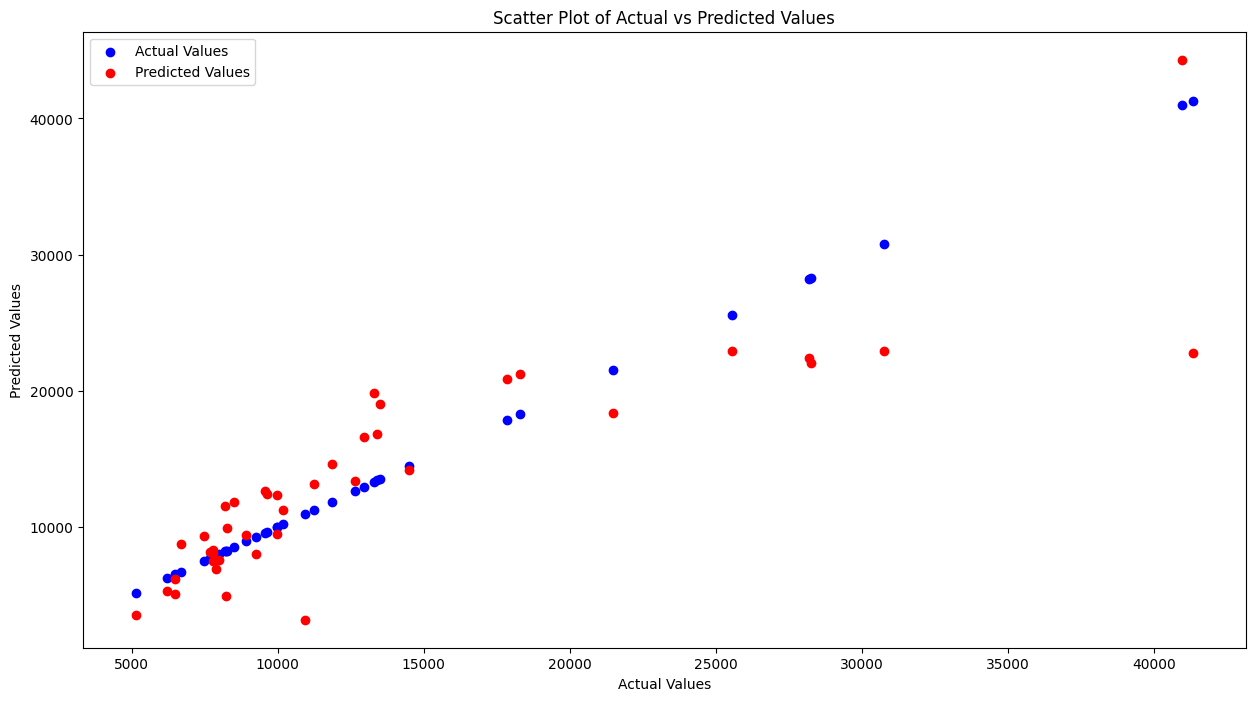

In [2007]:
# visualize scatter plot of the predicted vs actual values
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_test, color="blue", label="Actual Values")
plt.scatter(y_test, lr_pred, color="red", label="Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.legend()
plt.show()

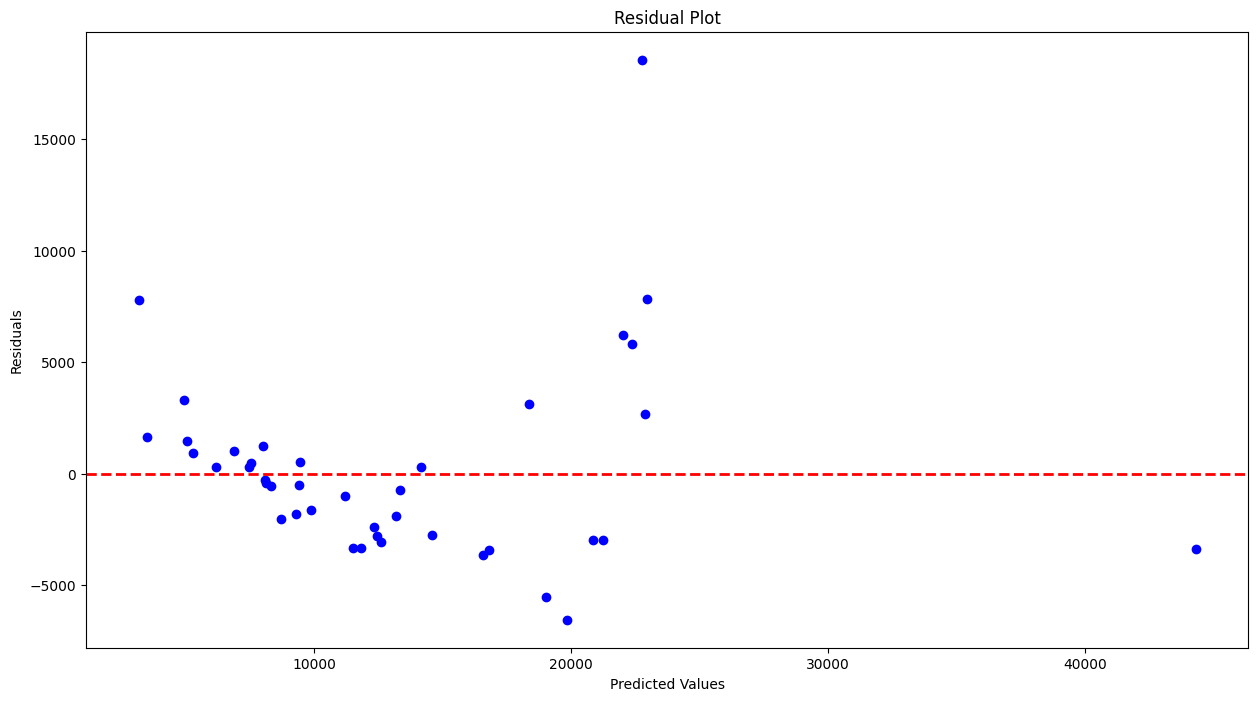

In [2008]:
# visualize residual plot
residuals = y_test - lr_pred

plt.figure(figsize=(15, 8))
plt.scatter(lr_pred, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)  # add horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#### Conclusion

The linear regression model exhibits a reasonable predictive performance as evidenced by the root mean square error (RMSE) of 4336.0186 and an R-squared score of 0.7618. These metrics suggest that the model accounts for a substantial portion of the variance in the target variable. The validation set's mean RMSE of 4450.1752, with a standard deviation of 1242.9568, further indicates consistency in performance. Potential areas for improvement may be identified through further analysis and refinement